## Observations and Insights

Observations of the data:
The goal of this analysis is to know the influence of certain treatments in cancer studies. So, to understand if the treatment is working, the decrease of tumor volume is analyzed. Also, other factors that could makes it to increase or decrease are analyzed.
a) The gender distribution used is equal to compare if gender is a factor of tumor volume. 
b) There were ten different treatments for these studies. Only two were the most effective in reducing the tumor volume, according to the box plot of four regimes. 
c) The number of days and tumor volume plot helps to know the efficiency of the treatment or if there is a rejection.
d) The final plot helps to understand if there is a relationship between tumor volume and weight. There is a relationship.

## Dependencies and starter code

In [6]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats 
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_stat = mouse_data.loc[:,["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"])
mouse_stat.count().head()

# Mean
mouse_mean = mouse_stat["Tumor Volume (mm3)"].mean()
# Median
mouse_median = mouse_stat["Tumor Volume (mm3)"].median()
# Variance
mouse_variance = mouse_stat["Tumor Volume (mm3)"].var()
# Standard deviation
mouse_stdev = mouse_stat["Tumor Volume (mm3)"].std()
# SEM (Standar Error of the Mean)
mouse_sem = mouse_stat["Tumor Volume (mm3)"].sem()

# Summary
stat_mouse_summary = pd.DataFrame({"Mean Tumor Volume (mm3)": mouse_mean, "Median Tumor Volume (mm3)": mouse_median,
                                   "Variance Tumor Volume (mm3)": mouse_variance, "St. Deviation Tumor Volume (mm3)": mouse_stdev,
                                  "SEM Tumor Volume (mm2)": mouse_sem})
stat_mouse_summary

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),St. Deviation Tumor Volume (mm3),SEM Tumor Volume (mm2)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

<IPython.core.display.Javascript object>


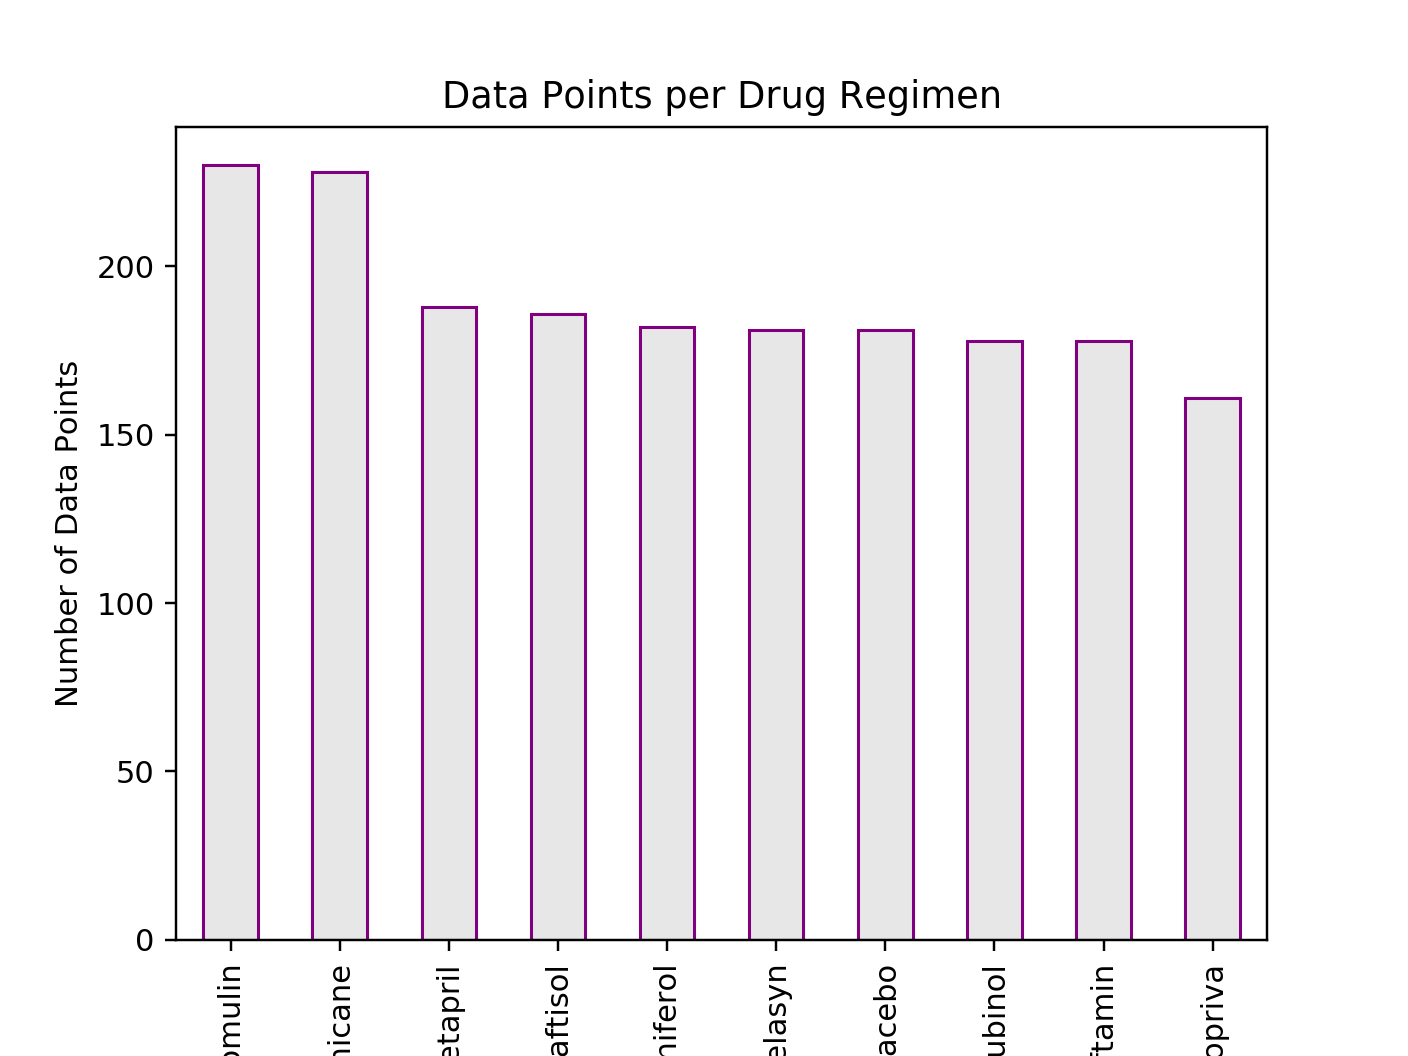

Text(0, 0.5, 'Number of Data Points')

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Mouse data per regimen
mouse_regimen = mouse_data.loc[:,["Mouse ID","Drug Regimen"]].groupby(["Drug Regimen"])
# Total data points
count_mouse_regimen = mouse_regimen["Mouse ID"].count().sort_values(ascending=False)
# Bar graph
bar_plot = count_mouse_regimen.plot(kind="bar", color=(0.1,0.1,0.1,0.1), edgecolor='purple', title=("Data Points per Drug Regimen"))
bar_plot.set_ylabel("Number of Data Points")

<IPython.core.display.Javascript object>


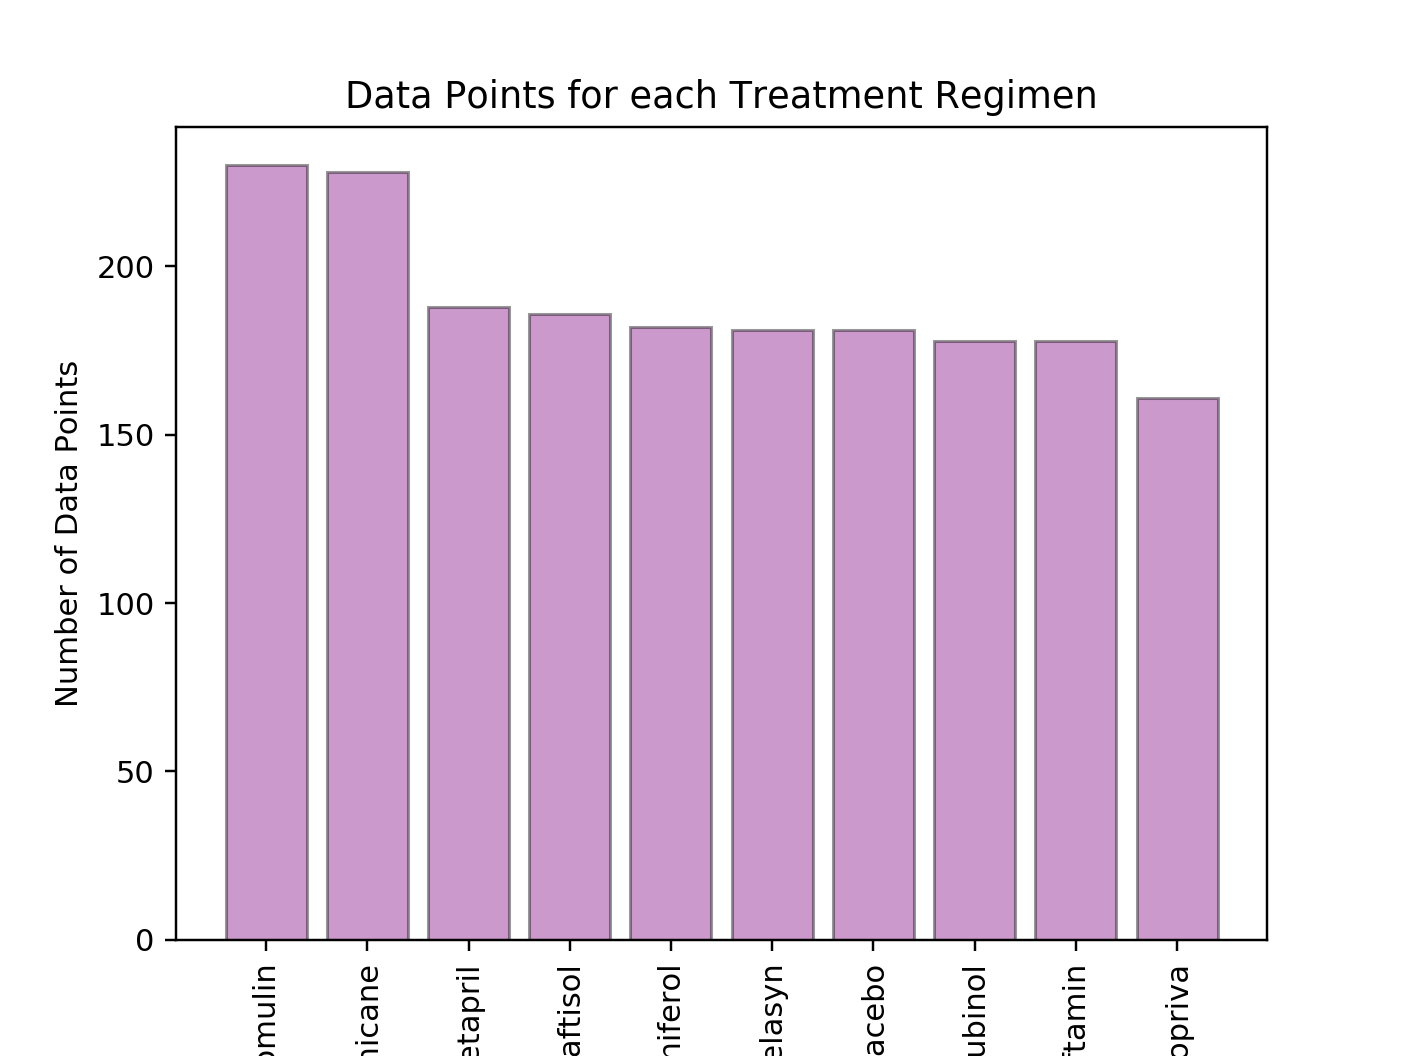

Text(0, 0.5, 'Number of Data Points')

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Using previous data
x_axis = np.arange(len(count_mouse_regimen))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, count_mouse_regimen, color="purple", alpha=0.4, edgecolor='black')
plt.xticks(tick_locations, count_mouse_regimen.keys(), rotation="vertical")
plt.title("Data Points for each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie plots

<IPython.core.display.Javascript object>


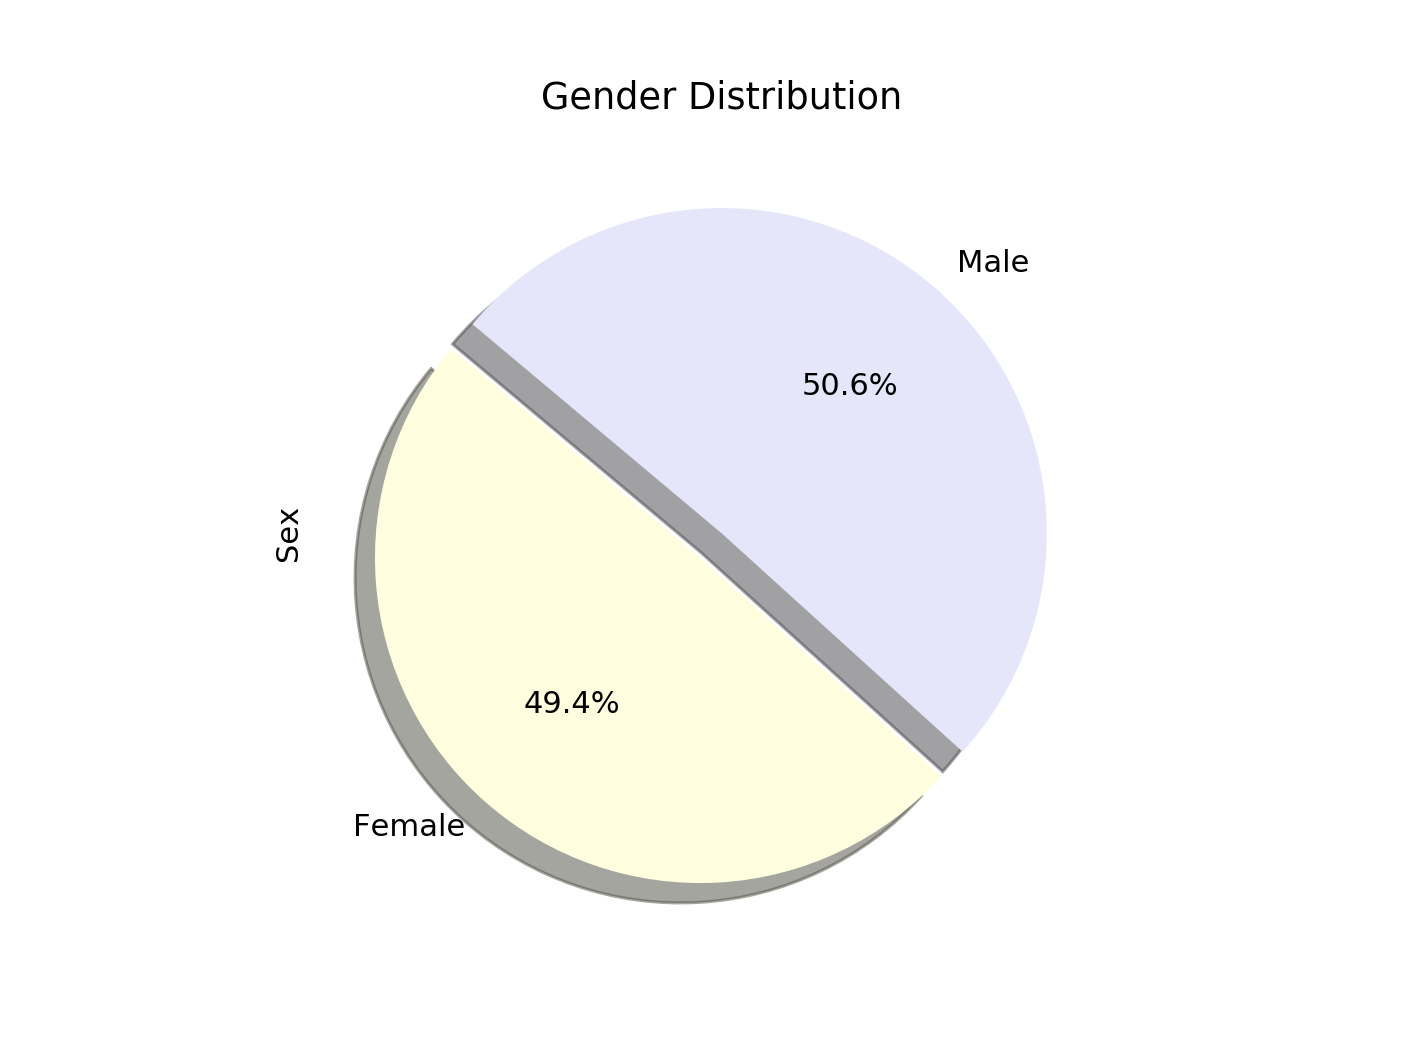

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Mouse data by gender
mouse_gender = mouse_data.loc[:,["Sex", "Mouse ID"]].groupby(["Sex"])
# Total values
count_mouse_gender = mouse_gender["Sex"].count()
# Pie plot
fig,ax1 = plt.subplots()
count_mouse_gender.plot(kind="pie", y=count_mouse_gender, autopct='%1.1f%%', colors=["lightyellow","lavender"],
                       explode=(0.1,0),shadow=True, title=("Gender Distribution"), startangle=140)

<IPython.core.display.Javascript object>


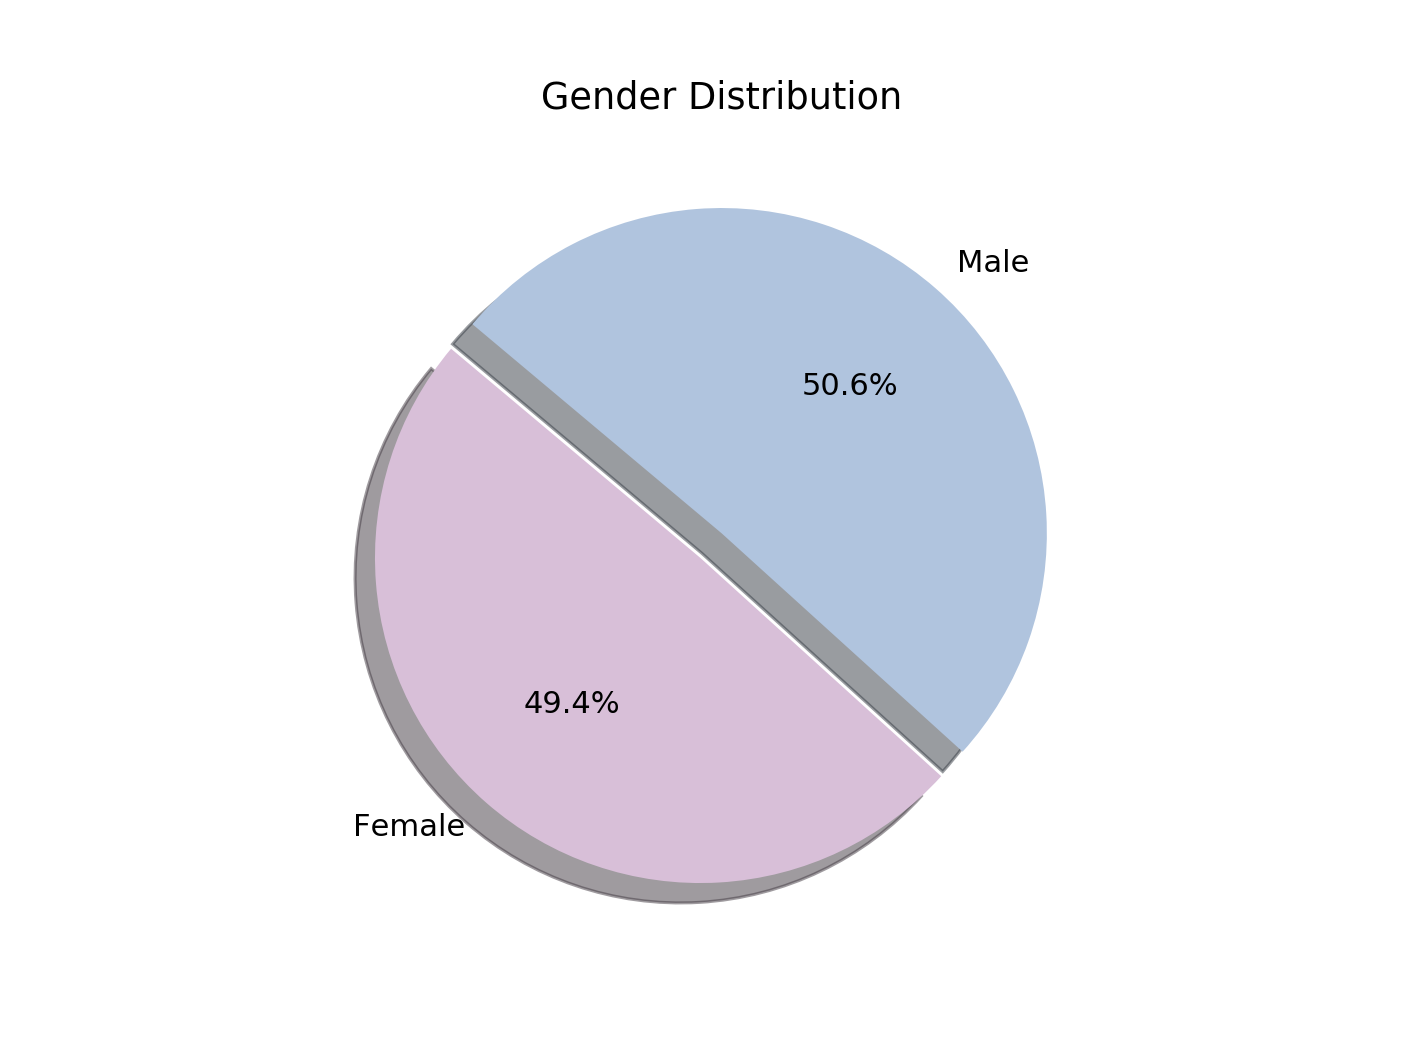

Text(0.5, 1.0, 'Gender Distribution')

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# With previous data
plt.pie(count_mouse_gender, labels=["Female","Male"], colors=["thistle", "lightsteelblue"],
        explode=(0.1,0), autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gender Distribution")

## Quartiles, outliers and boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Capomulin treatment IQR
volume_capomulin = mouse_data.loc[mouse_data["Drug Regimen"] == "Capomulin",:].groupby("Mouse ID") 
total_volume_capomulin = volume_capomulin["Tumor Volume (mm3)"].last()
quartiles_cap = total_volume_capomulin.quantile([.25,.5,.75])
#quartiles_cap
lowercap = quartiles_cap[0.25]
uppercap = quartiles_cap[0.75]
iqr_cap = uppercap-lowercap
print(f"The lower quartile is: {lowercap}")
print(f"The upper quartile is: {uppercap}")
print(f"The interquartile range is: {iqr_cap}")
print(f"The the median is: {quartiles_cap[0.5]} ") 

lower_bound_cap = lowercap - (1.5*iqr_cap)
upper_bound_cap = uppercap + (1.5*iqr_cap)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")

The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [23]:
# Ramicane treatment IQR
volume_ramicane = mouse_data.loc[mouse_data["Drug Regimen"] == "Ramicane",:].groupby("Mouse ID") 
total_volume_ramicane = volume_ramicane["Tumor Volume (mm3)"].last()
quartiles_ram = total_volume_ramicane.quantile([.25,.5,.75])
lowerram = quartiles_ram[0.25]
upperram = quartiles_ram[0.75]
iqr_ram = upperram-lowerram
print(f"The lower quartile is: {lowerram}")
print(f"The upper quartile is: {upperram}")
print(f"The interquartile range is: {iqr_ram}")
print(f"The the median is: {quartiles_ram[0.5]} ") 

lower_bound_ram = lowerram - (1.5*iqr_ram)
upper_bound_ram = upperram + (1.5*iqr_ram)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")

The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [24]:
# Infubinol treatment IQR
volume_infubinol = mouse_data.loc[mouse_data["Drug Regimen"] == "Infubinol",:].groupby("Mouse ID")
total_volume_infubinol = volume_infubinol["Tumor Volume (mm3)"].last()
quartiles_inf = total_volume_infubinol.quantile([.25,.5,.75])
lowerinf = quartiles_inf[0.25]
upperinf = quartiles_inf[0.75]
iqr_inf = upperinf-lowerinf
print(f"The lower quartile is: {lowerinf}")
print(f"The upper quartile is: {upperinf}")
print(f"The interquartile range is: {iqr_inf}")
print(f"The the median is: {quartiles_inf[0.5]} ") 

lower_bound_inf = lowerinf - (1.5*iqr_inf)
upper_bound_inf = upperinf + (1.5*iqr_inf)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")

The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [25]:
# Ceftamin treatmin IQR
volume_ceftamin = mouse_data.loc[mouse_data["Drug Regimen"] == "Ceftamin",:].groupby("Mouse ID")
total_volume_ceftamin = volume_ceftamin["Tumor Volume (mm3)"].last()
quartiles_cef = total_volume_ceftamin.quantile([.25,.5,.75])
lowercef = quartiles_cef[0.25]
uppercef = quartiles_cef[0.75]
iqr_cef = uppercef-lowercef
print(f"The lower quartile is: {lowercef}")
print(f"The upper quartile is: {uppercef}")
print(f"The interquartile range is: {iqr_cef}")
print(f"The the median is: {quartiles_cef[0.5]} ") 

lower_bound_cef = lowercef - (1.5*iqr_cef)
upper_bound_cef = uppercef + (1.5*iqr_cef)
print(f"Values below {lower_bound_cef} could be outliers.")
print(f"Values above {upper_bound_cef} could be outliers.")

The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


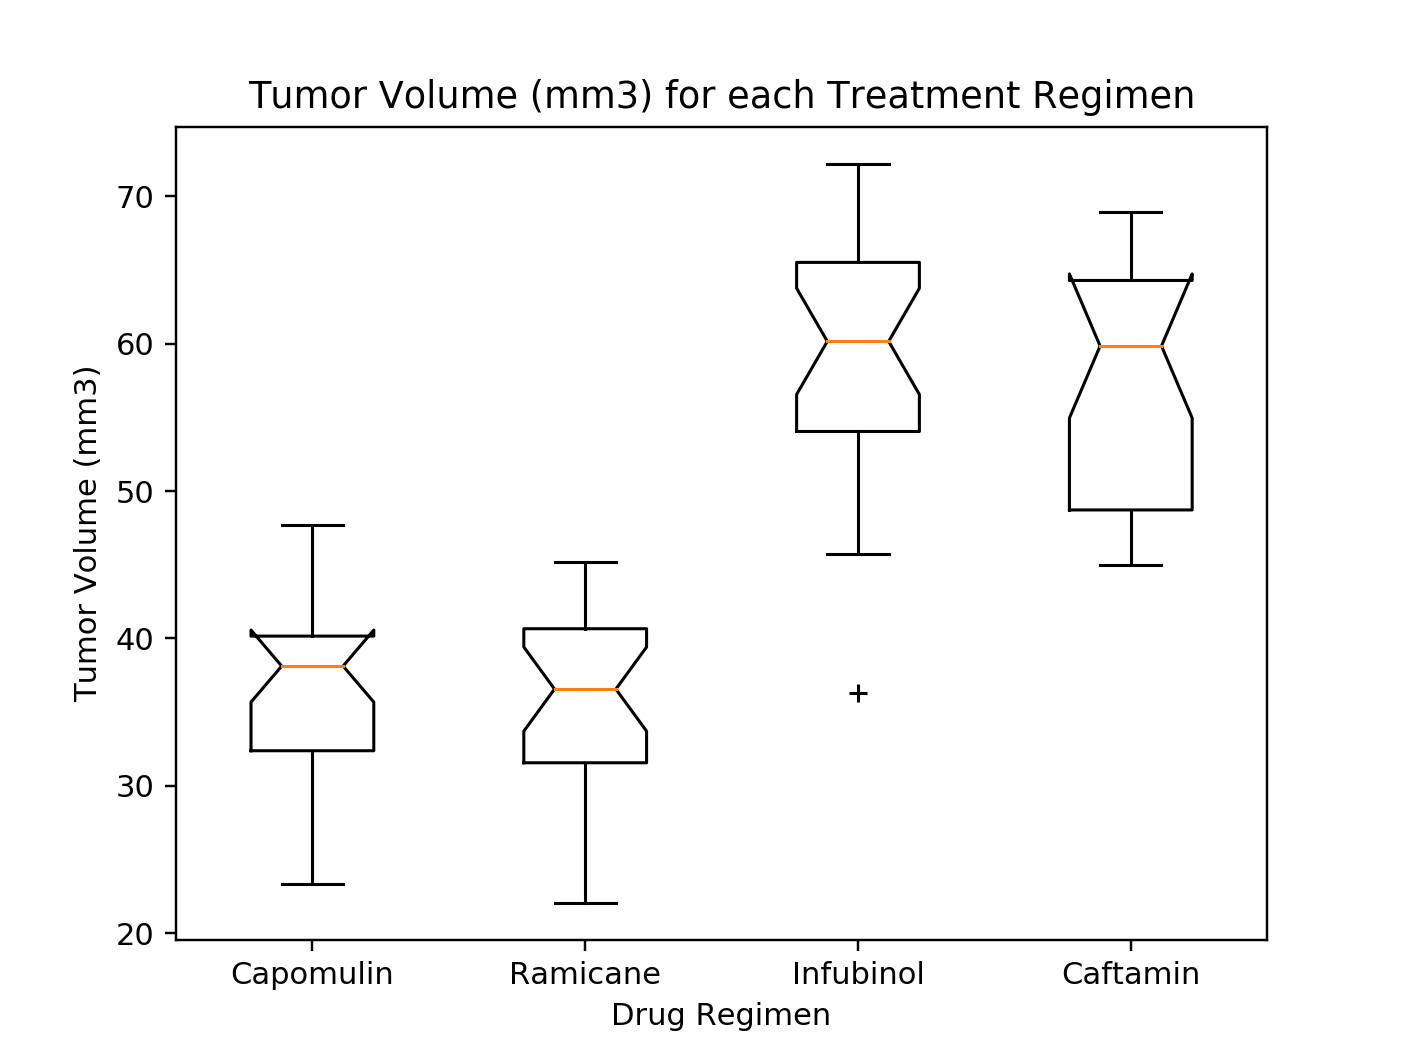

Text(0.5, 0, 'Drug Regimen')

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig,ax1 = plt.subplots()
columns = ["Capomulin", "Ramicane", "Infubinol", "Caftamin"]
regimenes = [total_volume_capomulin, total_volume_ramicane, total_volume_infubinol,total_volume_ceftamin]
ax1.boxplot(regimenes, notch=True, sym='+')
ax1.set_ylabel("Tumor Volume (mm3)")
plt.setp(ax1,xticklabels=columns)
plt.title("Tumor Volume (mm3) for each Treatment Regimen")
plt.xlabel("Drug Regimen")

## Line and scatter plots

<IPython.core.display.Javascript object>


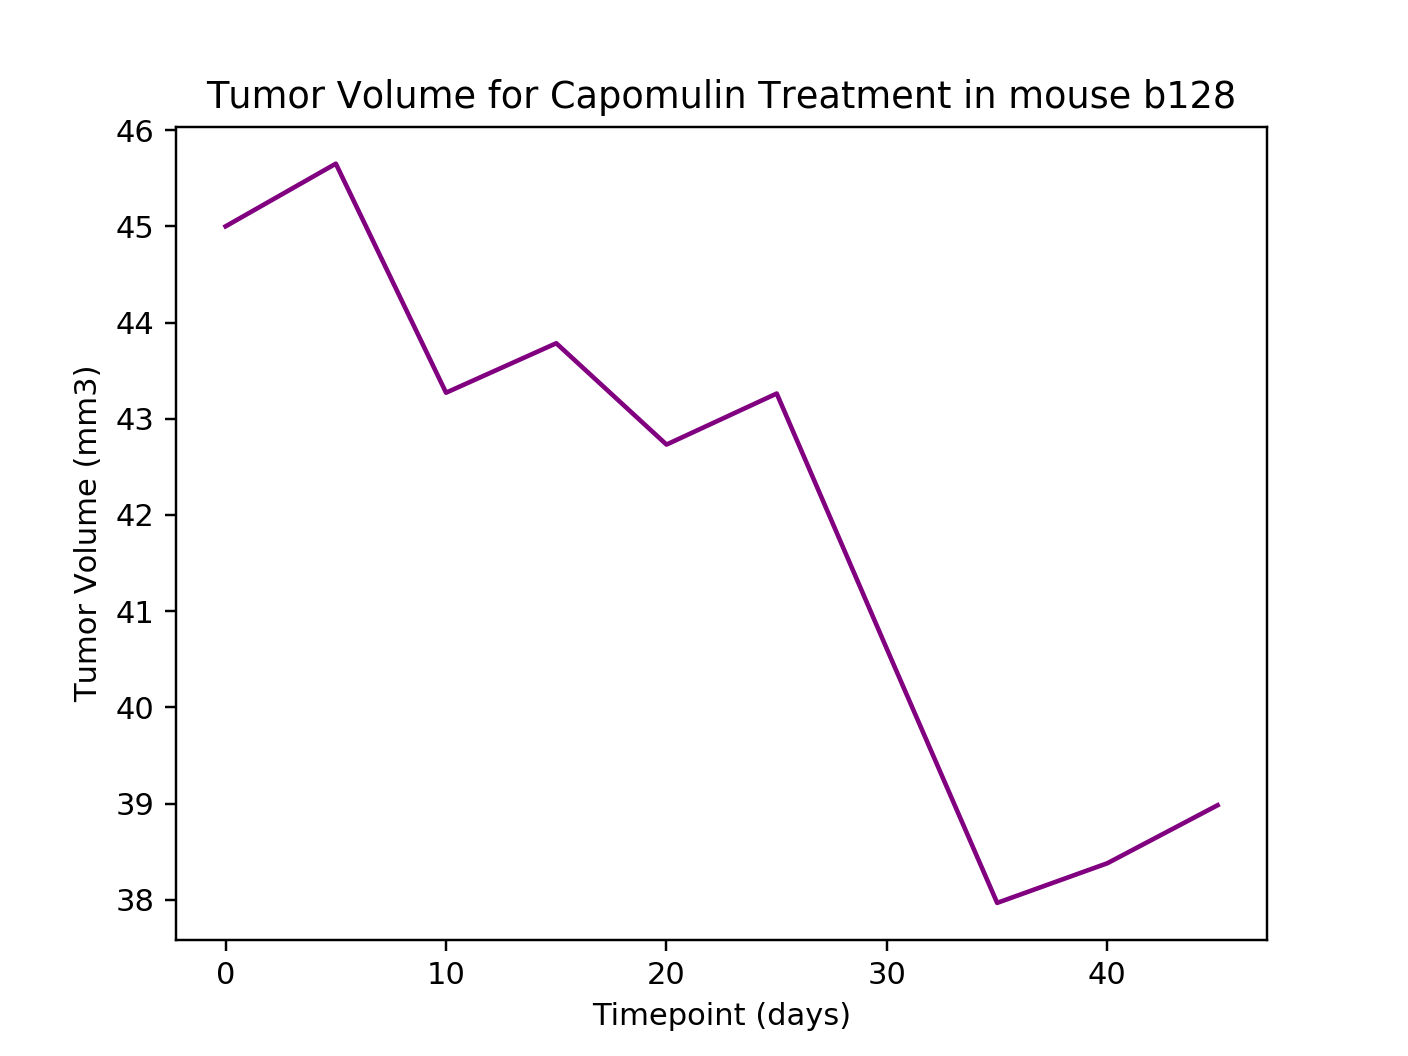

Text(0.5, 1.0, 'Tumor Volume for Capomulin Treatment in mouse b128')

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Volume data of one mouse
onemouse_volume = volume_capomulin["Tumor Volume (mm3)"].unique()
one_data_volume = onemouse_volume.iloc[0:1] # Just first row data
#print(one_data_volume) # mouse b128
onemouse_timepoint = volume_capomulin["Timepoint"].unique()
one_data_timepoint = onemouse_timepoint.iloc[0:1]
#print(one_data_timepoint)
# Line plot
plt.plot(one_data_timepoint[0], one_data_volume[0], color="purple")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume for Capomulin Treatment in mouse b128")

<IPython.core.display.Javascript object>


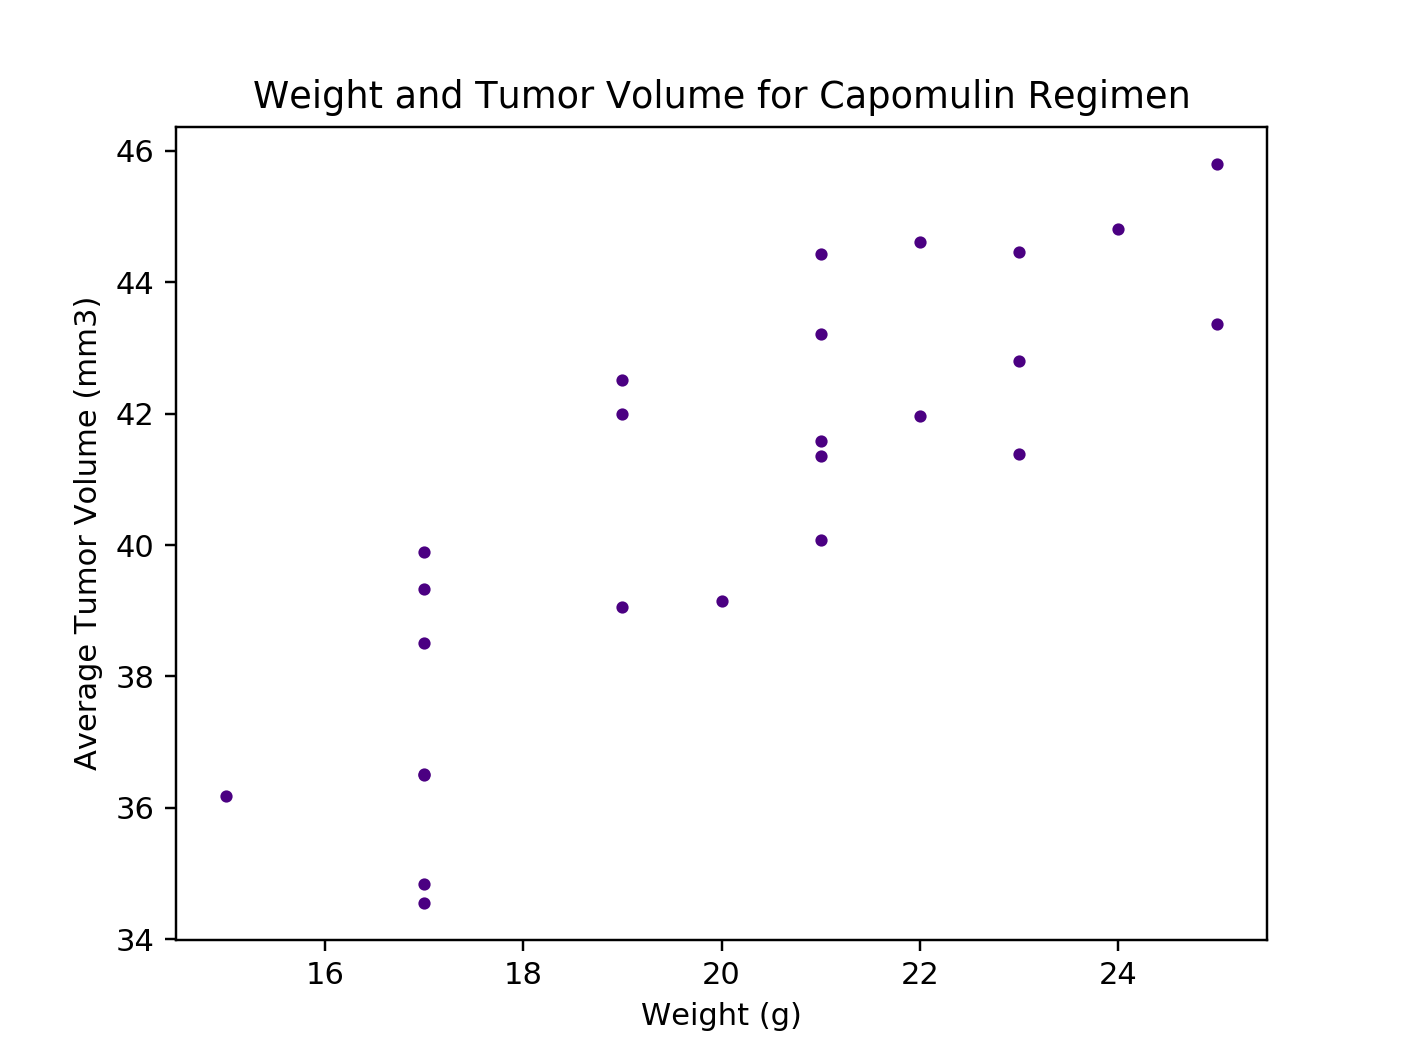

Text(0.5, 1.0, 'Weight and Tumor Volume for Capomulin Regimen')

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Average volume in Capomulin regimen
avrg_volume_capomulin = volume_capomulin["Tumor Volume (mm3)"].mean() 
# Mouse weight values in Capomulin regimen
weight_data_capomulin = volume_capomulin["Weight (g)"].unique() # Just the non repited weights
# Scatter plot
plt.scatter(weight_data_capomulin,avrg_volume_capomulin, marker='.', color='indigo')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight and Tumor Volume for Capomulin Regimen")

<IPython.core.display.Javascript object>


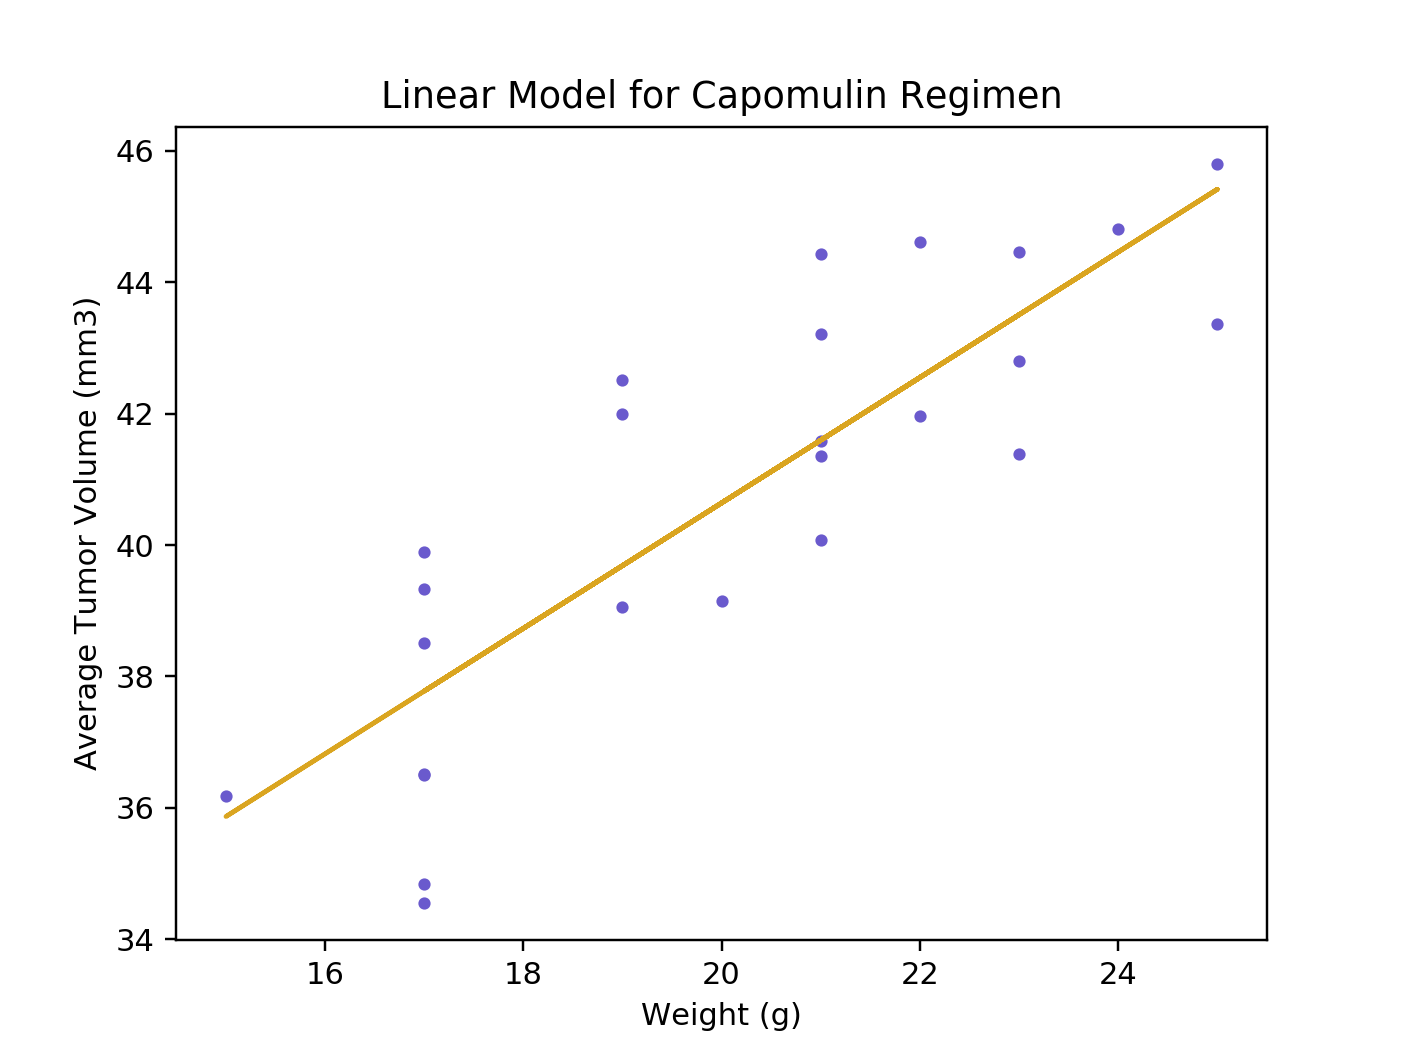

Text(0.5, 1.0, 'Linear Model for Capomulin Regimen')

In [37]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Using Pearson correlation
tolist_weight = weight_data_capomulin.astype(float).values.tolist() # Does not accept Series type?
tolist_volume = avrg_volume_capomulin.astype(float).values.tolist()
r,p = scipy.stats.pearsonr(tolist_weight, tolist_volume)
# Linear regression model
mouse_slope, mouse_int, mouse_r, mouse_p, mouse_stder = scipy.stats.linregress(tolist_weight, tolist_volume)
mouse_fit = mouse_slope * weight_data_capomulin + mouse_int # slope eq
plt.scatter(weight_data_capomulin,avrg_volume_capomulin, marker='.',color='slateblue')
plt.plot(weight_data_capomulin, mouse_fit, '-', color='goldenrod')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear Model for Capomulin Regimen")